In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import sklearn.datasets
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble
import sklearn.tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Machine Learning/credit_risk_dataset.csv")

df = pd.read_csv("credit_risk_dataset.csv")


In [ ]:
len(df)

32581

## Data Cleasing

In [ ]:
# check NA ratio
Na_per = df.isnull().sum() / df.shape[0]
Na_per

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [ ]:
df = df.fillna(method = 'backfill')

In [ ]:
Na_per = df.isnull().sum() / df.shape[0]
Na_per

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

## Describe Stats

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.780762,9589.371106,11.011071,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.131268,6322.086646,3.244322,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


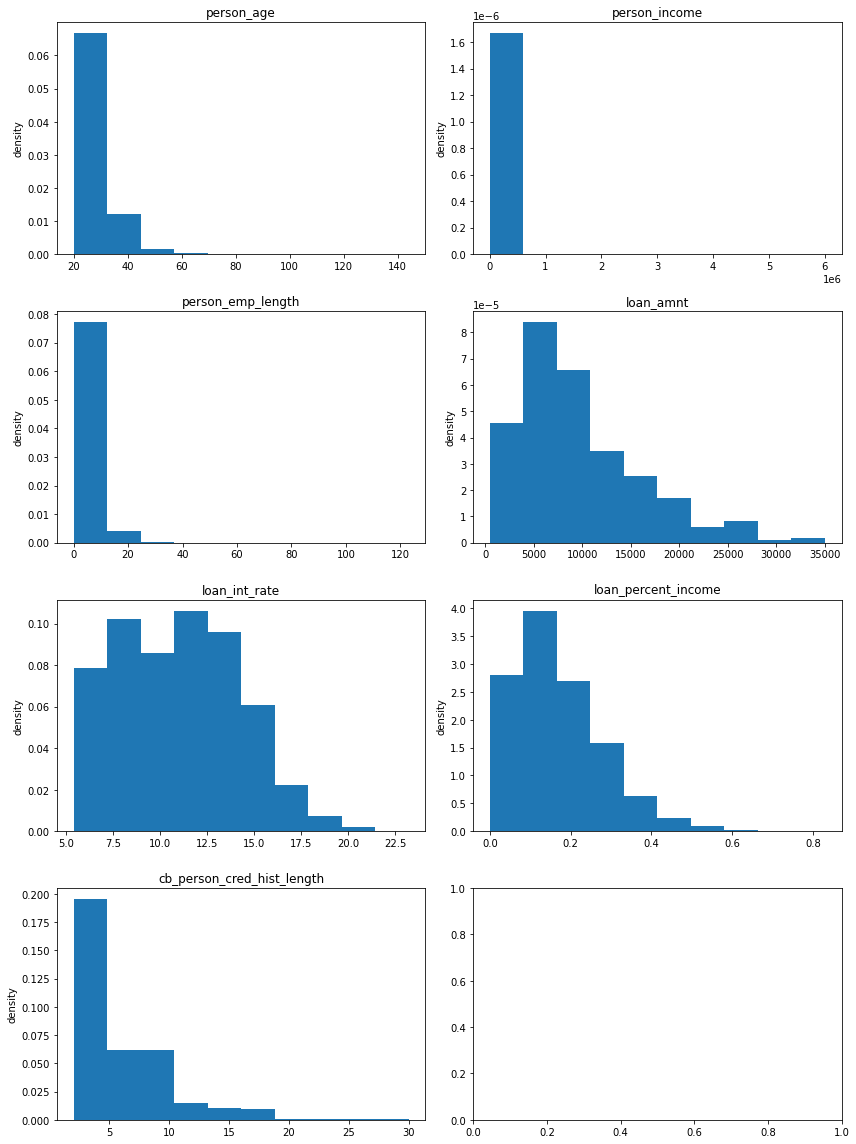

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,2,figsize =(12,16),tight_layout = True)

axs[0,0].hist(df['person_age'],density = True)
axs[0,0].set_title('person_age')
axs[0,0].set_ylabel('density')

axs[0,1].hist(df['person_income'], density = True)
axs[0,1].set_title('person_income')
axs[0,1].set_ylabel('density')

axs[1,0].hist(df['person_emp_length'], density = True)
axs[1,0].set_title('person_emp_length')
axs[1,0].set_ylabel('density')

axs[1,1].hist(df['loan_amnt'], density = True)
axs[1,1].set_title('loan_amnt')
axs[1,1].set_ylabel('density')

axs[2,0].hist(df['loan_int_rate'], density = True)
axs[2,0].set_title('loan_int_rate')
axs[2,0].set_ylabel('density')

axs[2,1].hist(df['loan_percent_income'], density = True)
axs[2,1].set_title('loan_percent_income')
axs[2,1].set_ylabel('density')

axs[3,0].hist(df['cb_person_cred_hist_length'], density = True)
axs[3,0].set_title('cb_person_cred_hist_length')
axs[3,0].set_ylabel('density')

plt.show()

person_age, person_income, and person_emp_length need to be further cleaned.

Remove Outliers

In [ ]:
# Remove Outliers
print(len(df[df['person_age']>80]) / len(df))
print(len(df[df['person_income']>1000000]) / len(df))
print(len(df[df['person_emp_length']>60]) / len(df))

0.00021484914520732943
0.0002762346152665664
6.138547005923697e-05


In [ ]:
df = df[df['person_age']<=80]
df = df[df['person_income']<=1000000]
df = df[df['person_emp_length']<=60]

len(df)

32564

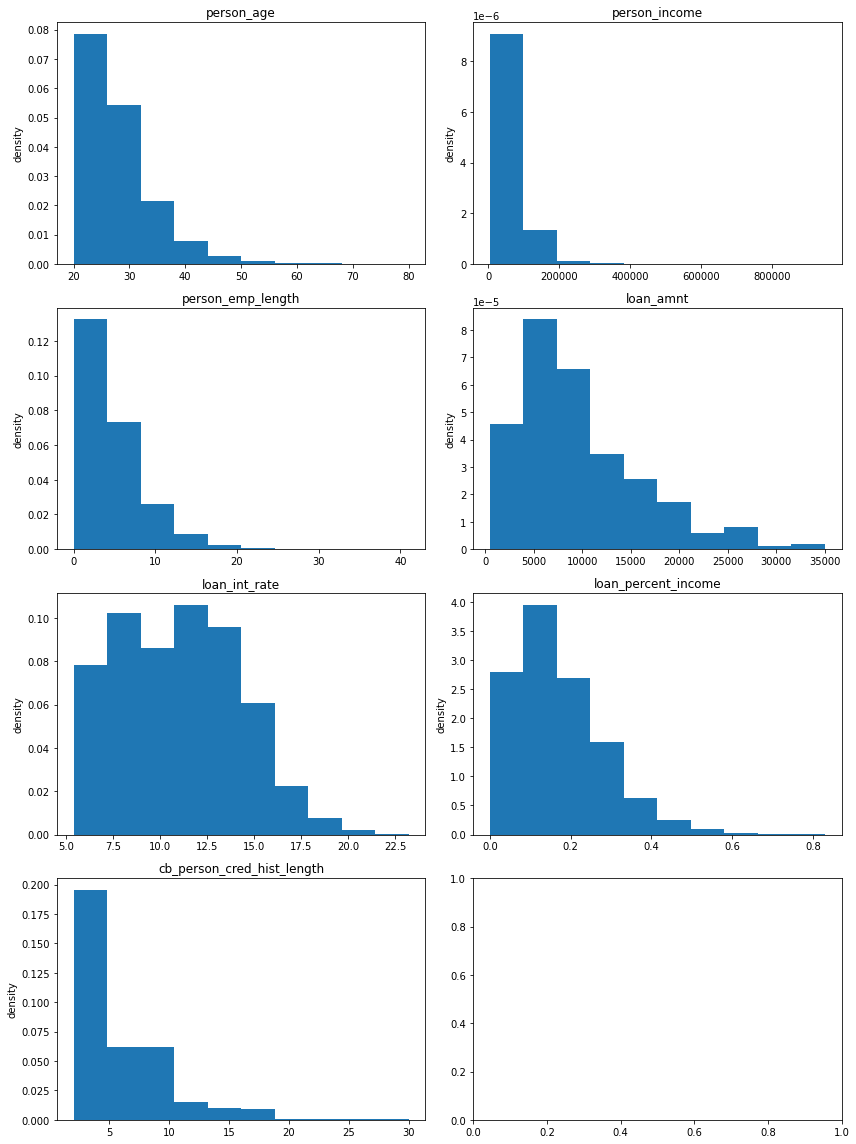

In [ ]:

fig, axs = plt.subplots(4,2,figsize =(12,16),tight_layout = True)

axs[0,0].hist(df['person_age'],density = True)
axs[0,0].set_title('person_age')
axs[0,0].set_ylabel('density')

axs[0,1].hist(df['person_income'], density = True)
axs[0,1].set_title('person_income')
axs[0,1].set_ylabel('density')

axs[1,0].hist(df['person_emp_length'], density = True)
axs[1,0].set_title('person_emp_length')
axs[1,0].set_ylabel('density')

axs[1,1].hist(df['loan_amnt'], density = True)
axs[1,1].set_title('loan_amnt')
axs[1,1].set_ylabel('density')

axs[2,0].hist(df['loan_int_rate'], density = True)
axs[2,0].set_title('loan_int_rate')
axs[2,0].set_ylabel('density')

axs[2,1].hist(df['loan_percent_income'], density = True)
axs[2,1].set_title('loan_percent_income')
axs[2,1].set_ylabel('density')

axs[3,0].hist(df['cb_person_cred_hist_length'], density = True)
axs[3,0].set_title('cb_person_cred_hist_length')
axs[3,0].set_ylabel('density')

plt.show()

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32564.000000,32564.000000,32564.000000,32564.000000,32564.000000,32564.000000,32564.000000,32564.00000
mean,27.710294,65522.756725,4.773124,9588.398999,11.011269,0.218247,0.170241,5.80024
std,6.178842,47103.778618,4.025782,6320.958590,3.244507,0.413062,0.106738,4.04681
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.00000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.00000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.00000
75%,30.000000,79200.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,8.00000
max,80.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.00000


## Feature Transfer

In [ ]:
set(df['loan_grade'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [ ]:
df['rent'] = np.where(df['person_home_ownership'] == 'RENT',1,0)
df['own'] = np.where(df['person_home_ownership'] == 'OWN',1,0)
df['mortgage'] = np.where(df['person_home_ownership'] == 'MORTGAGE',1,0)
df['other'] = np.where(df['person_home_ownership'] == 'OTHER',1,0)

df['personal'] = np.where(df['loan_intent'] == 'PERSONAL',1,0)
df['education'] = np.where(df['loan_intent'] == 'EDUCATION',1,0)
df['venture'] = np.where(df['loan_intent'] == 'VENTURE',1,0)
df['medical'] = np.where(df['loan_intent'] == 'MEDICAL',1,0)
df['home_improvement'] = np.where(df['loan_intent'] == 'HOMEIMPROVEMENT',1,0)
df['debt_consolidation'] = np.where(df['loan_intent'] == 'DEBTCONSOLIDATION',1,0)

df['loan_grade_A'] = np.where(df['loan_grade'] == 'A',1,0)
df['loan_grade_B'] = np.where(df['loan_grade'] == 'B',1,0)
df['loan_grade_C'] = np.where(df['loan_grade'] == 'C',1,0)
df['loan_grade_D'] = np.where(df['loan_grade'] == 'D',1,0)
df['loan_grade_E'] = np.where(df['loan_grade'] == 'E',1,0)
df['loan_grade_F'] = np.where(df['loan_grade'] == 'F',1,0)
df['loan_grade_G'] = np.where(df['loan_grade'] == 'G',1,0)

df['hist_default_Y'] = np.where(df['cb_person_default_on_file'] == 'Y',1,0)
df['hist_default_N'] = np.where(df['cb_person_default_on_file'] == 'N',1,0)

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,debt_consolidation,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,hist_default_Y,hist_default_N
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,0,1,0,0,0,0,0,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,0,1,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'rent',
       'own', 'mortgage', 'other', 'personal', 'education', 'venture',
       'medical', 'home_improvement', 'debt_consolidation', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'hist_default_Y', 'hist_default_N'],
      dtype='object')

Data processing and cross validation

In [ ]:
data_x = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
       'rent','own', 'mortgage', 'other', 'personal', 'education', 'venture', 'medical',
       'home_improvement', 'debt_consolidation', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'hist_default_Y', 'hist_default_N']] 
data_y = df['loan_status']
data_y.value_counts() 


0    25457
1     7107
Name: loan_status, dtype: int64

In [ ]:
# here need to split the data into training and testing sets
from sklearn import model_selection

x_train_val, x_test, y_train_val, y_test = model_selection.train_test_split(data_x,data_y,random_state = 42, test_size = 0.1)


In [ ]:
# define a function to set k-fold df
def k_fold(k,i,x_train_val, y_train_val):
    skf = StratifiedKFold(n_splits=k)
    for j,(train_index, val_index) in enumerate(skf.split(x_train_val, y_train_val)):
        if i == j:
            train_x = x_train_val.iloc[train_index]
            train_y = y_train_val.iloc[train_index]
            val_x = x_train_val.iloc[val_index]
            val_y = y_train_val.iloc[val_index]
    return train_x, train_y, val_x, val_y

In [ ]:
# split test data and val data
train_x_1, train_y_1, val_x_1, val_y_1 = k_fold(3,0,x_train_val,y_train_val)
train_x_2, train_y_2, val_x_2, val_y_2 = k_fold(3,1,x_train_val,y_train_val)
train_x_3, train_y_3, val_x_3, val_y_3 = k_fold(3,2,x_train_val,y_train_val)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_x_1 = sc.fit_transform(train_x_1)
val_x_1 = sc.fit_transform(val_x_1)
train_x_2 = sc.fit_transform(train_x_2)
val_x_2 = sc.fit_transform(val_x_2)
train_x_3 = sc.fit_transform(train_x_3)
val_x_3 = sc.fit_transform(val_x_3)

train_x = [train_x_1,train_x_2,train_x_3] # use in validation stage
train_y = [train_y_1,train_y_2,train_y_3]
val_x = [val_x_1,val_x_2,val_x_3]
val_y = [val_y_1,val_y_2,val_y_3]

#Classification Tasks

In [ ]:
def Average(l): 
    avg = sum(l) / len(l) 
    return avg


## Perceptron

Hyperparameter training:
iter =  100
Accuracy of perceptron:  0.7758555976387894
Precision of perceptron:  0.48439506372875124
Recall of perceptron:  0.37760053027925267
AUC of perceptron:  0.6324113160586157
iter =  500
Accuracy of perceptron:  0.7758555976387894
Precision of perceptron:  0.48439506372875124
Recall of perceptron:  0.37760053027925267
AUC of perceptron:  0.6324113160586157
iter =  1000
Accuracy of perceptron:  0.7758555976387894
Precision of perceptron:  0.48439506372875124
Recall of perceptron:  0.37760053027925267
AUC of perceptron:  0.6324113160586157
iter =  10000
Accuracy of perceptron:  0.7758555976387894
Precision of perceptron:  0.48439506372875124
Recall of perceptron:  0.37760053027925267
AUC of perceptron:  0.6324113160586157
iter =  100000
Accuracy of perceptron:  0.7758555976387894
Precision of perceptron:  0.48439506372875124
Recall of perceptron:  0.37760053027925267
AUC of perceptron:  0.6324113160586157


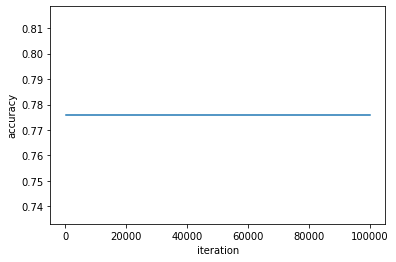

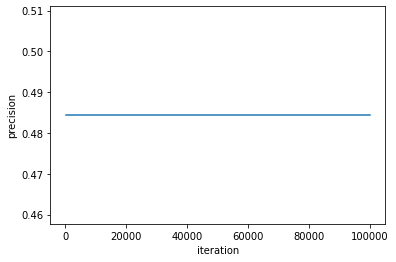

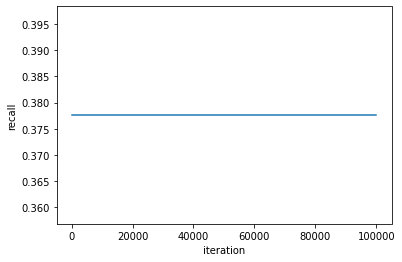

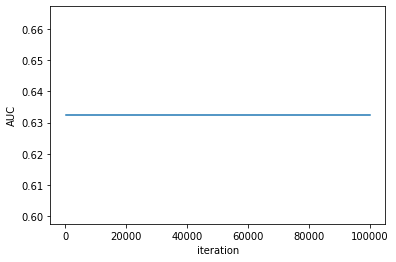

In [ ]:
# perceptron
 

def perceptron(iter,train_x, train_y,val_x,val_y) :                  
  dic = {'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
  for i in range(3):
    perceptron = sklearn.linear_model.Perceptron(max_iter=iter,random_state=0) #max_iter=iter
    perceptron.fit(train_x[i], train_y[i])
    dic['accuracys'].append(perceptron.score(val_x[i],val_y[i])) 
    dic['precisions'].append(precision_score(val_y[i], perceptron.predict(val_x[i])))
    dic['recalls'].append(recall_score(val_y[i], perceptron.predict(val_x[i])))
    dic['AUCs'].append(roc_auc_score(val_y[i], perceptron.predict(val_x[i])))

  print("Accuracy of perceptron: ", Average(dic['accuracys']))
  print("Precision of perceptron: ", Average(dic['precisions']))
  print("Recall of perceptron: ", Average(dic['recalls']))
  print("AUC of perceptron: ", Average(dic['AUCs']))
  return (Average(dic['accuracys']), Average(dic['precisions']), Average(dic['recalls']) ,Average(dic['AUCs']))


print("Hyperparameter training:")
iters = [100, 500, 1000, 10000, 100000]   
accuracys = []
precisions = []
recalls = []
AUCs = []
for iter in iters:
  print('iter = ', iter)
  acc, preci, recall, auc = perceptron(iter,train_x, train_y,val_x,val_y)
  accuracys.append(acc)
  precisions.append(preci)
  recalls.append(recall)
  AUCs.append(auc)

plt.plot(iters, accuracys)
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()

plt.plot(iters, precisions)
plt.xlabel('iteration')
plt.ylabel('precision')
plt.show()

plt.plot(iters, recalls)
plt.xlabel('iteration')
plt.ylabel('recall')
plt.show()

plt.plot(iters, AUCs)
plt.xlabel('iteration')
plt.ylabel('AUC')
plt.show()


In [ ]:
print("Performance measure on training data:")

dic = {'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
for i in range(3):
  perceptron = sklearn.linear_model.Perceptron(random_state=0) #max_iter=iter
  perceptron.fit(train_x[i], train_y[i])
  dic['accuracys'].append(perceptron.score(train_x[i], train_y[i]))
  dic['precisions'].append(precision_score(train_y[i], perceptron.predict(train_x[i])))
  dic['recalls'].append(recall_score(train_y[i], perceptron.predict(train_x[i])))
  dic['AUCs'].append(roc_auc_score(train_y[i], perceptron.predict(train_x[i])))

print("Accuracy of perceptron: ", Average(dic['accuracys']))
print("Precision of perceptron: ", Average(dic['precisions']))
print("Recall of perceptron: ", Average(dic['recalls']))
print("AUC of perceptron: ", Average(dic['AUCs']))


Performance measure on training data:
Accuracy of perceptron:  0.7774422492919779
Precision of perceptron:  0.4859927835727631
Recall of perceptron:  0.3843571531888756
AUC of perceptron:  0.6358536571952516


## KNN

Hyperparameter training:
when k =  1
Accuracy of perceptron:  0.8574743235404512
Precision of perceptron:  0.6829929295470203
Recall of perceptron:  0.6489705719889934
AUC of perceptron:  0.7823728988104032
when k =  2
Accuracy of perceptron:  0.8822465622547515
Precision of perceptron:  0.894933214372294
Recall of perceptron:  0.5224868984882506
AUC of perceptron:  0.7526638128937568
when k =  3
Accuracy of perceptron:  0.8856928378885591
Precision of perceptron:  0.8107323936317226
Recall of perceptron:  0.6221108450447642
AUC of perceptron:  0.790752422529874
when k =  5
Accuracy of perceptron:  0.8940526154161121
Precision of perceptron:  0.8606956310494779
Recall of perceptron:  0.6147723888977903
AUC of perceptron:  0.793457954781652
when k =  10
Accuracy of perceptron:  0.8933360630566076
Precision of perceptron:  0.9133484225227345
Recall of perceptron:  0.5657411654876586
AUC of perceptron:  0.7753389012424496


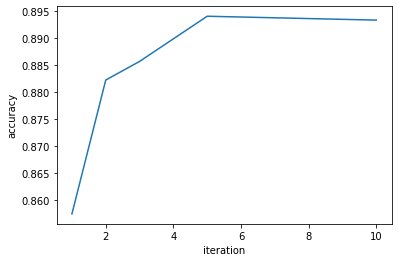

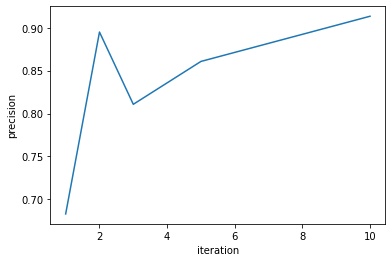

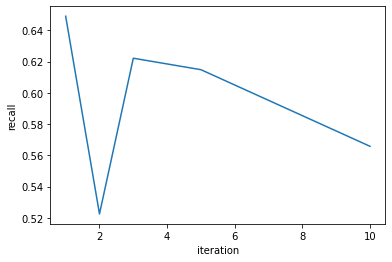

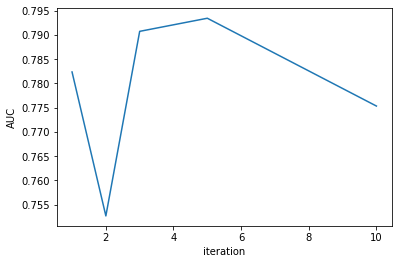

In [ ]:
# KNN
def knn(k,train_x, train_y,val_x,val_y):
  dic = {'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
  for i in range(3):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x[i], train_y[i])
    dic['accuracys'].append(knn.score(val_x[i],val_y[i])) 
    dic['precisions'].append(precision_score(val_y[i], knn.predict(val_x[i])))
    dic['recalls'].append(recall_score(val_y[i], knn.predict(val_x[i])))
    dic['AUCs'].append(roc_auc_score(val_y[i], knn.predict(val_x[i])))

  print("Accuracy of perceptron: ", Average(dic['accuracys']))
  print("Precision of perceptron: ", Average(dic['precisions']))
  print("Recall of perceptron: ", Average(dic['recalls']))
  print("AUC of perceptron: ", Average(dic['AUCs']))
  return Average(dic['accuracys']), Average(dic['precisions']), Average(dic['recalls']), Average(dic['AUCs'])

print("Hyperparameter training:")
Ks = [1, 2, 3, 5,10]
accuracys = []
precisions = []
recalls = []
AUCs = []
for k in Ks:
  print("when k = ",k)
  acc, preci, recall, auc = knn(k,train_x, train_y,val_x,val_y)
  accuracys.append(acc)
  precisions.append(preci)
  recalls.append(recall)
  AUCs.append(auc)
plt.plot(Ks, accuracys)
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()

plt.plot(Ks, precisions)
plt.xlabel('iteration')
plt.ylabel('precision')
plt.show()

plt.plot(Ks, recalls)
plt.xlabel('iteration')
plt.ylabel('recall')
plt.show()

plt.plot(Ks, AUCs)
plt.xlabel('iteration')
plt.ylabel('AUC')
plt.show()


In [ ]:
print("Performance measure on training data:")

dic = {'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
for i in range(3):
  knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3) # adjust k
  knn.fit(train_x[i], train_y[i])
  dic['accuracys'].append(knn.score(train_x[i], train_y[i]))
  dic['precisions'].append(precision_score(train_y[i], knn.predict(train_x[i])))
  dic['recalls'].append(recall_score(train_y[i], knn.predict(train_x[i])))
  dic['AUCs'].append(roc_auc_score(train_y[i], knn.predict(train_x[i])))

print("Accuracy of perceptron: ", Average(dic['accuracys']))
print("Precision of perceptron: ", Average(dic['precisions']))
print("Recall of perceptron: ", Average(dic['recalls']))
print("AUC of perceptron: ", Average(dic['AUCs']))


Performance measure on training data:
Accuracy of perceptron:  0.9287371617702256
Precision of perceptron:  0.92329750476528
Recall of perceptron:  0.7349317712484883
AUC of perceptron:  0.8589298871569362


## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
def logistic(solver,c,train_x, train_y,val_x,val_y):
  dic = {'training_acc':[],'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
  for i in range(3):
    clf_log = make_pipeline(StandardScaler(),LogisticRegression(random_state = 0,solver = solver, C = c,max_iter=1000))
    clf_log.fit(train_x[i], train_y[i])
    dic['training_acc'].append(clf_log.score(train_x[i],train_y[i]))
    dic['accuracys'].append(clf_log.score(val_x[i],val_y[i])) 
    dic['precisions'].append(precision_score(val_y[i], clf_log.predict(val_x[i])))
    dic['recalls'].append(recall_score(val_y[i], clf_log.predict(val_x[i])))
    dic['AUCs'].append(roc_auc_score(val_y[i], clf_log.predict(val_x[i])))

  print("Accuracy of training: ", Average(dic['training_acc']))
  print("Accuracy of validation: ", Average(dic['accuracys']))
  print("Precision of validation: ", Average(dic['precisions']))
  print("Recall of validation: ", Average(dic['recalls']))
  print("AUC of validation: ", Average(dic['AUCs']))
  return Average(dic['accuracys']), Average(dic['precisions']), Average(dic['recalls']), Average(dic['AUCs'])

c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']

for c in c_values:
  for solver in solvers:
    print("-----C_value:",c,"------solver:",solver,'------')
    logistic(solver,c,train_x, train_y,val_x,val_y)

-----C_value: 100 ------solver: newton-cg ------
Accuracy of training:  0.8680178796874466
Accuracy of validation:  0.8668236257549391
Precision of validation:  0.7693451342558907
Recall of validation:  0.5579313256176531
AUC of validation:  0.7555627227911194
-----C_value: 100 ------solver: lbfgs ------
Accuracy of training:  0.8680178796874466
Accuracy of validation:  0.8668236257549391
Precision of validation:  0.7693451342558907
Recall of validation:  0.5579313256176531
AUC of validation:  0.7555627227911194
-----C_value: 100 ------solver: sag ------
Accuracy of training:  0.8680178796874466
Accuracy of validation:  0.8668236257549391
Precision of validation:  0.7693451342558907
Recall of validation:  0.5579313256176531
AUC of validation:  0.7555627227911194
-----C_value: 100 ------solver: saga ------
Accuracy of training:  0.8680178796874466
Accuracy of validation:  0.8668577472958678
Precision of validation:  0.7693937381308985
Recall of validation:  0.5580874536426336
AUC of val

There is no significant change by hyperparameter tuning...

## SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
# SVM
def svm(kernel,c,train_x, train_y,val_x,val_y):
  dic = {'training_acc':[],'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
  for i in range(3):
    svm = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel = kernel, C = c))
    svm.fit(train_x[i], train_y[i])
    dic['training_acc'].append(svm.score(train_x[i],train_y[i]))
    dic['accuracys'].append(svm.score(val_x[i],val_y[i])) 
    dic['precisions'].append(precision_score(val_y[i], svm.predict(val_x[i])))
    dic['recalls'].append(recall_score(val_y[i], svm.predict(val_x[i])))
    dic['AUCs'].append(roc_auc_score(val_y[i], svm.predict(val_x[i])))

  print("Accuracy of training: ", Average(dic['training_acc']))
  print("Accuracy of validation: ", Average(dic['accuracys']))
  print("Precision of validation: ", Average(dic['precisions']))
  print("Recall of validation: ", Average(dic['recalls']))
  print("AUC of validation: ", Average(dic['AUCs']))
  return Average(dic['accuracys']), Average(dic['precisions']), Average(dic['recalls']), Average(dic['AUCs'])

C = [100, 75, 50, 10, 1]
kernels = ['poly', 'rbf', 'sigmoid']

for c in C:
  for kernel in kernels:
    print("-----C_value:",c,"------kernel:",kernel,'------')
    svm(kernel,c,train_x, train_y,val_x,val_y)

-----C_value: 100 ------kernel: poly ------
Accuracy of training:  0.9280547309516498
Accuracy of validation:  0.9108062920121472
Precision of validation:  0.896242690054656
Recall of validation:  0.6694270013688638
AUC of validation:  0.8238634489535209
-----C_value: 100 ------kernel: rbf ------
Accuracy of training:  0.9433582420582113
Accuracy of validation:  0.9113522366670078
Precision of validation:  0.887100766449081
Recall of validation:  0.6809817189739448
AUC of validation:  0.8283745313631027
-----C_value: 100 ------kernel: sigmoid ------
Accuracy of training:  0.7658409253761901
Accuracy of validation:  0.7654485276555089
Precision of validation:  0.46373016427546304
Recall of validation:  0.46783404190874195
AUC of validation:  0.6582499078079941
-----C_value: 75 ------kernel: poly ------
Accuracy of training:  0.9273040570512164
Accuracy of validation:  0.9103627119800729
Precision of validation:  0.8961245875596022
Recall of validation:  0.6672405505598001
AUC of validat

In [ ]:
def svm_poly(degree,train_x, train_y,val_x,val_y):
  dic = {'training_acc':[],'accuracys':[], 'precisions':[], 'recalls':[],'AUCs':[]}
  for i in range(3):
    svm = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel = 'poly',degree = degree, C = 50))
    svm.fit(train_x[i], train_y[i])
    dic['training_acc'].append(svm.score(train_x[i],train_y[i]))
    dic['accuracys'].append(svm.score(val_x[i],val_y[i])) 
    dic['precisions'].append(precision_score(val_y[i], svm.predict(val_x[i])))
    dic['recalls'].append(recall_score(val_y[i], svm.predict(val_x[i])))
    dic['AUCs'].append(roc_auc_score(val_y[i], svm.predict(val_x[i])))

  print("Accuracy of training: ", Average(dic['training_acc']))
  print("Accuracy of validation: ", Average(dic['accuracys']))
  print("Precision of validation: ", Average(dic['precisions']))
  print("Recall of validation: ", Average(dic['recalls']))
  print("AUC of validation: ", Average(dic['AUCs']))
  return Average(dic['accuracys']), Average(dic['precisions']), Average(dic['recalls']), Average(dic['AUCs'])

degrees = [2,3,4,5]


for degree in degrees:
  print("-----degree:",degree,'------')
  svm_poly(degree,train_x, train_y,val_x,val_y)

-----degree: 2 ------
Accuracy of training:  0.9045449892517147
Accuracy of validation:  0.9001603712423654
Precision of validation:  0.8924788782735321
Recall of validation:  0.6175836444553701
AUC of validation:  0.7983783935683314
-----degree: 3 ------
Accuracy of training:  0.9269116593305352
Accuracy of validation:  0.9110792643395774
Precision of validation:  0.9000405154254808
Recall of validation:  0.6672405505598001
AUC of validation:  0.8232504937724411
-----degree: 4 ------
Accuracy of training:  0.9400655133585832
Accuracy of validation:  0.9038454976626745
Precision of validation:  0.8694648453799153
Recall of validation:  0.6589637166956754
AUC of validation:  0.8156408986869678
-----degree: 5 ------
Accuracy of training:  0.9487323847544955
Accuracy of validation:  0.8999215204558637
Precision of validation:  0.8458261198245948
Recall of validation:  0.662866697833742
AUC of validation:  0.8145359648464687


c = 50, kernel = rbf makes the highest accuracy

## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
x_train_val, x_test, y_train_val, y_test = model_selection.train_test_split(data_x,data_y,random_state = 42, test_size = 0.1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_val)
y_train = np.array(y_train_val)
x_val = sc.fit_transform(x_test)
y_val = np.array(y_test)

y_val = np.expand_dims(y_val,axis=1)
y_train = np.expand_dims(y_train,axis=1)


In [ ]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x_train,y_train):
    self.x_train = torch.tensor(x_train,dtype=torch.float32)
    self.y_train = torch.tensor(y_train,dtype=torch.float32)
    self.length = self.x_train.shape[0]
 
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]
  def __len__(self):
    return self.length
train_set = dataset(x_train,y_train)
#DataLoader
#trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [ ]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x_val,y_val):
    self.x_val = torch.tensor(x_val,dtype=torch.float32)
    self.y_val = torch.tensor(y_val,dtype=torch.float32)
    self.length = self.x_val.shape[0]
 
  def __getitem__(self,idx):
    return self.x_val[idx],self.y_val[idx]
  def __len__(self):
    return self.length
val_set = dataset(x_val,y_val)
#DataLoader
#valloader = DataLoader(valset,batch_size=64,shuffle=False)

In [ ]:
# define NN
class Clf(nn.Module):
    def __init__(self):
        super(Clf, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(26,64),
            nn.ReLU(),
            nn.Linear(64,96),
            nn.ReLU(),
            nn.Linear(96,1)
        )

    def forward(self, x):
        return self.layers(x)

Train Epoch: 0 	Loss: 0.561539	Val Loss: 0.454072	Val Acc: 0.786306
Train Epoch: 1 	Loss: 0.397853	Val Loss: 0.370485	Val Acc: 0.848327
Train Epoch: 2 	Loss: 0.344457	Val Loss: 0.338469	Val Acc: 0.870126
Train Epoch: 3 	Loss: 0.319785	Val Loss: 0.321853	Val Acc: 0.878416
Train Epoch: 4 	Loss: 0.304378	Val Loss: 0.310437	Val Acc: 0.880872
Train Epoch: 5 	Loss: 0.292961	Val Loss: 0.300936	Val Acc: 0.885477
Train Epoch: 6 	Loss: 0.283711	Val Loss: 0.292786	Val Acc: 0.891925
Train Epoch: 7 	Loss: 0.276080	Val Loss: 0.286193	Val Acc: 0.896838
Train Epoch: 8 	Loss: 0.269654	Val Loss: 0.280923	Val Acc: 0.900522
Train Epoch: 9 	Loss: 0.264346	Val Loss: 0.276855	Val Acc: 0.902671
Train Epoch: 10 	Loss: 0.259985	Val Loss: 0.273763	Val Acc: 0.905434
Train Epoch: 11 	Loss: 0.256456	Val Loss: 0.271205	Val Acc: 0.905434
Train Epoch: 12 	Loss: 0.253491	Val Loss: 0.269204	Val Acc: 0.906663
Train Epoch: 13 	Loss: 0.250962	Val Loss: 0.267483	Val Acc: 0.906356
Train Epoch: 14 	Loss: 0.248709	Val Loss: 0.

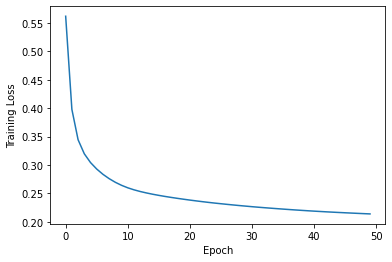

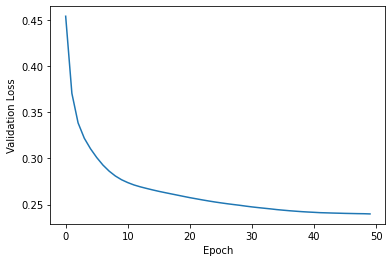

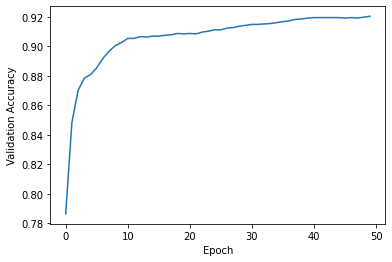

<Figure size 432x288 with 0 Axes>

In [ ]:
def train(model, device, train_loader, val_loader, optimizer, n_epochs):

    # send the model (and data) to the device
    model.to(device)
    training_loss = []
    val_loss = []
    val_acc = []
    for epoch in range(n_epochs):

        # switch to training mode
        model.train()
        total_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # move the data to the device (e.g., cuda)
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = F.binary_cross_entropy_with_logits(output,target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        training_loss.append(total_loss/len(train_loader))
        print('Train Epoch: {} \tLoss: {:.6f}'.format(
            epoch, total_loss / len(train_loader)), end='\t')

        # switch to evaluation mode
        model.eval()
        total_loss = 0
        acc = 0
        total_samples = 0

        for batch_idx, (data, target) in enumerate(val_loader):
            # move the data to the device (e.g., cuda)
            data, target = data.to(device), target.to(device)

            # disable gradient - otherwise we are training on validation set!
            with torch.no_grad():

                output = model(data)
                loss = F.binary_cross_entropy_with_logits(output,target)
                output = torch.sigmoid(output)
                output = output > 0.5
                true_positive = torch.count_nonzero(output==target)
                acc += true_positive
                total_samples += len(target)
                total_loss += loss.item()
        val_loss.append(total_loss / len(val_loader))
        val_acc.append(acc / total_samples)
        print('Val Loss: {:.6f}\tVal Acc: {:.6f}'.format(
            total_loss / len(val_loader), acc / total_samples))
    return training_loss,val_loss,val_acc
        

model = Clf()
batch_size = 512
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
training_loss, val_loss, val_acc = train(model, 'cpu', train_loader, val_loader, optimizer, 50)

epoch = range(50)
plt.plot(epoch, training_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()
plt.clf()

plt.plot(epoch, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.show()
plt.clf()

plt.plot(epoch, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.show()
plt.clf()

# Test Dataset and Feature Importance

In [ ]:
def model_assess(model,name='Default'):
  model.fit(x_train_val,y_train_val)
  y_pre = model.predict(x_test)
  acc = model.score(x_test, y_test)
  precision = precision_score(y_test, y_pre)
  recall = recall_score(y_test, y_pre)
  auc = roc_auc_score(y_test, y_pre)  
  print(name,'\n','Accuracy: {:.6f} \tPrecision: {:.6f}\tValidation_Recall: {:.6f}\t AUC: {:.6f}'.format(acc,precision,recall,auc))

In [ ]:
x_train_val = sc.fit_transform(x_train_val)
x_test = sc.fit_transform(x_test)

In [ ]:
#Perceptron
perceptron = sklearn.linear_model.Perceptron(max_iter=100,random_state=0)
model_assess(perceptron,name = 'Perceptron')
#KNN
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
model_assess(knn, name='KNN')
#Logistic Regression
lg = LogisticRegression(random_state = 0)
model_assess(lg, 'Logistic Regression')
#SVM
from sklearn import svm
svm = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel = 'rbf',C=50))
model_assess(svm, 'SVM')

Perceptron 
 Accuracy: 0.778938 	Precision: 0.490710	Validation_Recall: 0.638691	 AUC: 0.728116
KNN 
 Accuracy: 0.892539 	Precision: 0.832392	Validation_Recall: 0.628734	 AUC: 0.796943
Logistic Regression 
 Accuracy: 0.855695 	Precision: 0.722753	Validation_Recall: 0.537696	 AUC: 0.740461
SVM 
 Accuracy: 0.913417 	Precision: 0.890538	Validation_Recall: 0.682788	 AUC: 0.829844


As SVM gives the highest accuracy, precision, validation recall, and AUC, we use SVM to investigate feature importance

Text(0.5, 0, 'Feature Importance')

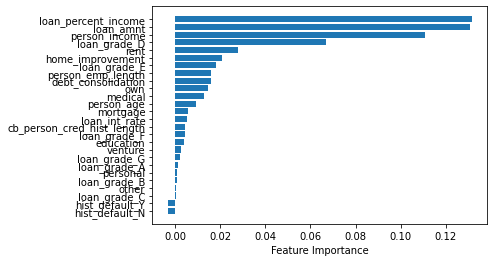

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svm.fit(x_train_val, y_train_val)

f_importance = permutation_importance(svm, x_test, y_test)

feature_names = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
       'rent','own', 'mortgage', 'other', 'personal', 'education', 'venture', 'medical',
       'home_improvement', 'debt_consolidation', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'hist_default_Y', 'hist_default_N']
features = np.array(feature_names)

sorted_idx = f_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], f_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")